In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import DataGenerator, KneeLocator 

In [2]:
#5 Aug. 14, 2017       S&P 500: +1.00%


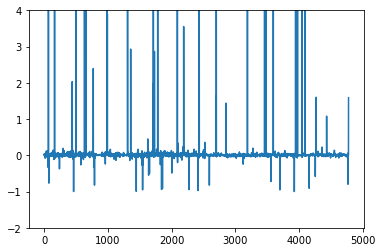

In [3]:
data = pd.read_csv("5.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 08/13/2017'].values
price2=data['Price 8/14/2017'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

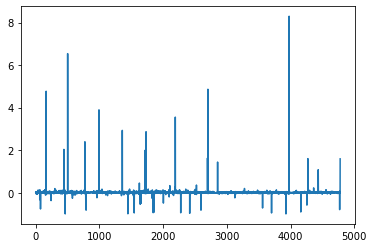

In [5]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
#plt.ylim(-2,4)
plt.show()

In [7]:
cluster_distance=[]
clusters=[]
for k in range(10,50): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1  #how many stocks in each cluster 
            count[int(price3index[i][0])][1]+=pricechange[i]   #sum of distance in each cluster
            center=count[:,1]/(count[:,0]+1e-9)  #new centers

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print('cluster number:',k,total)
    cluster_distance.append(total)
    clusters.append(k)

cluster number: 10 49.691368330907636
cluster number: 11 42.38685972409045
cluster number: 12 36.63634261335439
cluster number: 13 35.19536148406998
cluster number: 14 37.19963224714156
cluster number: 15 31.85978007352774
cluster number: 16 31.16178573037923
cluster number: 17 29.001391068712582
cluster number: 18 27.182551206062133
cluster number: 19 25.945637751455692
cluster number: 20 25.441038624821353
cluster number: 21 23.98904373379217
cluster number: 22 23.771945824250704
cluster number: 23 22.4841129024542
cluster number: 24 21.8919880655972
cluster number: 25 21.178919201753484
cluster number: 26 20.855821693160415
cluster number: 27 20.06635250624581
cluster number: 28 19.186724841460162
cluster number: 29 18.536740984356943
cluster number: 30 18.32573804732175
cluster number: 31 20.173542694620895
cluster number: 32 18.134251541315642
cluster number: 33 18.68860648975385
cluster number: 34 18.82826067230816
cluster number: 35 16.704865001220192
cluster number: 36 16.89193

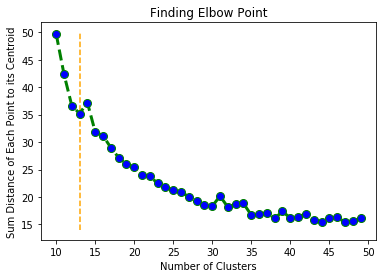

In [11]:
fig=plt.figure()
x=clusters
y=cluster_distance

kn=KneeLocator(x, y, curve='convex', direction='decreasing')

data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX4AAAEWCAYAAABhffzLAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nO3deXwU9fnA8c+TBAiHKEIQlCOAB1VQBIqgVOWy3lqspVipVlssWg9UrBenihaq2FalXqjFA23xrr8qhsOiohIQkqqInIqBcCkEISHk+f0xs7CEPWY3O3skz/v1mtfuzu7MPBnx2dnvfL/PV1QVY4wxdUdWqgMwxhiTXJb4jTGmjrHEb4wxdYwlfmOMqWMs8RtjTB1jid8YY+oYS/wm6USknYiUiUh2nNuvFpGB7vPbReSJxEboKYZxIvKs+zxfRFREcpIdR6xqeu5N7WCJ3/jGTdA73UQTWA5X1bWq2kRV99T0GKo6UVV/m4h4q3OT+Y5q8d/ix7Fi5X7x7HZj+k5EPhCRPtG2i+XcZ9IXmomNJX7jt/PcRBNYvk11QDE6oVr8k1IdUJAXVbUJkAfMB14WEUlxTCYDWOI3SVf9SlJE5orIXSLyvohsF5F3RKRF0OeHicgaEdksIndU21eoJpfLRGStiGwK/ryINBSRZ0Rkq4h8LiK3iMg3CfzTrhCRb0WkRERuCjpuAxF50H3vW/d5A/e9eSJykfu8rxv/2e7rgSLyabSDqupu4BmgFdBcRLJE5E73nJWKyD9E5OBq58jLuX/PffzO/WUR9ReFyQyW+E26uAT4DdASqA/cDCAixwJTgWHA4UBzoE2UffUFjgEGAGNE5Efu+rFAPtARGARcmtC/APoBRwFnALcG7kMAdwC9gW7ACUAv4E73vXnA6e7zU4GVwGlBr+dFO6j7JXI58I2qbnKfX+7G0xFoAjwUYRchz717fIBD3F87H0aLxWQGS/zGb6+6bdDficirET73lKp+qao7gZdwkiTAz4E3VfU9VS0HRgNVUY45XlV3quoSYAlOsgX4BTBRVbeq6jfAXz3Evygo/u9E5KdRjrtDVYuAp4Ch7vpfARNUtVRVNwLjcb7IwEnswYn+3qDXpxE58f9CRL4DvgZ6ABcGHe8BVV2pqmXAbcAvI7TVhzv3ppaymzbGbxeq6rsePrc+6PkPOFep4Fzlfx14Q1V3iMjmROyr2vNwuqvqVx4+V31/a4CuQcddU+29w93nHwJHi8hhOAn3fGC829zSi33NLaG8pKqhfrWEOl4OcFiY/YQ7X6aWsit+k+5KgLaBFyLSCKe5J959BTcTtQ33wTgF768dELiR/S3QPtR7qvoDUAhcDxSragXwAXAjsMJtuolVqONVAhti3I+V7q2lLPGbdPcv4Fz3xmd9YALx/7t9CbhNRJqJyBHAHxIVpGu0iDQSkeNw2sxfdNe/ANwpInnulfwY4Nmg7ea5sQSadeZWex2rF4CRItJBRJoAE3F6AFXGuJ+NOM1qHeOMw6QpS/wmranq/4BrgOdxrti3AvH2xJngbrsKeBfnS6U8yjZLqvXjfzDCZ+cBXwEFwJ9V9R13/d3AQmApUAQsctcFb3cQ+5p1qr+O1TRgurv9KmAXcG2sO3F/jdwDvO/e3+gdZzwmzYhNxGLqKhEZAfxSVU+L+mFjahG74jd1hoi0FpFT3H7uxwA3Aa+kOi5jks169Zi6pD7wKNAB+A6YATyS0oiMSQFr6jHGmDrGmnqMMaaOyYimnhYtWmh+fn6qwzDGmIxSWFi4SVXzqq/PiMSfn5/PwoULUx2GMcZkFBFZE2q9NfUYY0wdY4nfGGPqGEv8xhhTx1jiN8aYOibszV0R+RsRqvOp6nW+RGSMMcZXka74F+KUi80FugPL3aUb4GmSbHEm2y4SkU9FZKG77lARmSUiy93HZjX7E4wxxsQibOJX1WdU9RmcqeT6qerfVPVvONPZxTJDTz9V7aaqPd3XtwIFqnoUThXDW+OMPayyijLGzr6LvHvyyRqfTd49+YydfRdlFWWJPpQxxmQcL/34D8cpEbvFfd2EfbMHxeMC9s0x+gxO7fE/1mB/+ymrKKP31AGsKMxn16xXobQLm1oWM2nZRGYWDWDBiAKa1LcJhowxdZeXm7v3AYtF5GkReRqnlvhEj/tX4B0RKRSR4e66w1S1BMB9bBlqQxEZLiILRWThxo0bPR4OJs+f4iT96TNgfTeoyoH13dg1/UVWFLZn8vwpnvdljDG1kacibSLSCjjJffmRqq6P9Pmg7Q5X1W9FpCUwC2cyiNdV9ZCgz2xV1Yjt/D179lSvI3fz7sln00OvOkm/ulaLybt2MKW3r/K0r6jWu1PJthqYmP0ZY0wCiUhhUDP7XpF69XRW1S9EpLu7KjCR9OFuQl8U7aCqGphXtFREXsGZPHqDiLRW1RIRaQ2UxvzXRLC58mso7RL6zdIubN7tZX5tj4rdSZQs8RtjMkikNv4bgeHA/SHeU6B/pB2LSGMgS1W3u8/PwJn67nXgMpwmpMuA1+KIO6zmOW3Z1LI49BV/y2Ka10v0/NrGGJNZwiZ+VR3uPvaLc9+HAa+ISOA4z6vqf0TkE+AlEbkSWAtcHOf+Q7q6z5VMWjaRXdNfBCToHSV30L2M6H1FIg9njDEZJ2qvHhGpB4wATnVXzQUeVdXdkbZT1ZXACSHWb8bpEuqLUX1HMrNoACsYwq5ZtznNPi2LqTfgLjr1WMeovtP8OrQxxmQEL905pwL12DdF3TB33W/9CqommtRvwoIRBUyeP4X7O57JDjbC7kac0K4rc35jXTmNMcZL4v+xqgZfuc8WkSV+BZQITeo3YXz/0fRp92POeu4sqL+DnBwSn/R7PZrY/RljTBJ4Sfx7RKSTqq4AEJGOeCzZkGontjpx7/Ml65dQWVVJTlYC555pekzi9mWMMUniZQDXKGCOiMwVkXnAbOAmf8NKjMOaHMYRBx0BwM7KnSzbtCyxB/jmDWcxxpgMEvHyV0SygJ049XqOwekm84WqlichtoTo3ro767avA2BRySKOa3lc4nb+hdvTtc15idunMcb4LOIVv6pWAferarmqLlXVJZmU9MFJ/AGL1y9OYSTGGJMevDT1vCMiF4nbIT/TnNjqRBpkN6Dn4T1p07RNqsMxxpiU83Kn80agMVApIrtwmntUVZv6GlmCnHXUWWy/bTv1suulOhRjjEkLURO/qh6UjED8Uj+7fqpDMMaYtOJl5G6Bqg6Itq5O6jM91REYY0zMIlXnzAUaAS3c6REDbfxNqdlELLVHYyv4ZozJPJGu+K8CbsBJ8oXsS/zbgId9jiuhtpdvZ9bKWSwqWYQg3NX/rsTseM2LzmP7IYnZnzHGJEGk6px/Af4iIte6c+1mrNIdpVz00kUA5DXKY0K/CSSkk9Lyqc6jJX5jTAbxcnP3byJyMpAf/HlV/YePcSVUh2YdaNqgKdvKt7Hxh42s277OunYaY+qsqP34RWQ68GegL/BjdzlgKq90liVZ+9XtWVQSdfIwY4yptbz04+8JHKteJudNY91bd2femnmAk/jPP+b8FEdkjDGp4WXkbjHQyu9A/BZcusGu+I0xdZmXK/4WwGci8jGwt06PqmbUJbMvTT19/5WY/RhjTBJ5Sfzj/A4iGY5pcQwNcxqys3In67avo3RHKS0bt6zZTnNbJCY4Y4xJoqhNPao6D1gN1HOffwJ4vmQWkWwRWSwib7qvx4nIOhH51F3OjjP2mORk5XBCq30TiS0uSUClzpVPO4sxxmQQL716fgf8CwjMM3gE8GoMx7ge+Lzauimq2s1d3ophXzXSvVWC2/kt8RtjMpCXm7vXAKfgjNhFVZcDntpIRKQNcA7wRLwBJtKJrYPa+dfbDV5jTN3kpY2/XFUrAiNdRSQH8Nq180HgFqB6hc8/iMivgYXATaq6tfqGIjIcGA7Qrl07j4eL7JS2p/C77r+je+vu9GnTJyH7NMaYTOPlin+eiNwONBSRQcA/gagTzYrIuUCpqhZWe2sq0AnoBpQA94faXlUfU9WeqtozLy/PQ5jR/SjvRzx23mP8vufv92vvN8aYusRL4r8V2AgU4RRuewu408N2pwDni8hqYAbQX0SeVdUNqrrHndbxcaBXXJEbY4yJi4QbkCsieUCeqn5WbX0XYIOqbvR8EJHTgZtV9VwRaa2qJe76kcBJqvrLSNv37NlTFy5c6PVwyVP5g/OY0yi1cRhjTAgiUqiqB5TYiXTF/zcgVBvLEcBfahDLJBEpEpGlQD9gZA32VSPby7fXbAc5jSzpG2MyTqSbu13dfvv7UdW3RSRku3w4qjoXmOs+HxbLtom2bts6hr85nEUli2iW24zPrvks+kbhfPmI83j01YkJzhhjkiBS4o80O3nGzlzerGEz/vPVf6jSKjaUbWBHxQ4a128c387WvuQ8WuI3xmSQSE09y0ONqhWRs4CV/oXkr0b1GtG5RWcAFGXJhiUpjsgYY5Ir0hX/SOBNEfkFztSL4JRo7gOc63dgfureujufbXSaeBaVLOLktienOCJjjEmesFf8qvol0BWYhzP7Vr77/Hj3vYwVXLohITV7jDEmg0Qcuauq5cBTSYolaTq36Ax7smFPA6YtforXiwu4us+VjOo7kib1m6Q6PGOM8ZWXkg21SllFGTe9ORqWnw1zJ0BpFza1LGbSsonMLBrAghEF3pP/wLm+xmqMMX7wMnK3Vpk8fwqrFneCGa/B+m5QlQPru7Fr+ousKGzP5PlTUh2iMcb4KqbELyLNROR4v4JJhkc+fJJds24DpNo7wq5ZtzF1wTTvO/v8z85ijDEZxEs9/rki0lREDgWWAE+JyAP+h+aPzZVfQ2mX0G+WdmHz7q+972zdm85ijDEZxMsV/8Gqug0YDDylqj2Agf6G5Z/mOW2hZXHoN1sW07xe2+QGZIwxSeYl8eeISGvgF0DGX95e3edKcgdN5MApBZTcQfcyovcVqQjLGGOSxkviHw+8DXylqp+ISEdgub9h+WdU35F06rGG3GFDoNViyNoNrRaTO2wInXqsYVTflNWMM8aYpPDSnbNEVffe0FXVlZncxt+kfhMWjChg8vwpTO08mM27v6Z5vbaM6H0Fo/pOi60ff3ZD/wI1xhifhK3Hv/cDIotUtXu0dX5K23r8xhiTxsLV4w97xS8ifYCTgTwRuTHoraZAduJDTI1t5duYv3Y+81bP47qTruOIpkekOiRjjPFVpKae+kAT9zPBk6VvA37uZ1DJdNFLF/HuyncB6HpYVy49/lLvGxfd5Tx2He1DZMYY44+wid+dhGWeiDytqmuSGFNSndru1L2Jf97qebEl/g0FzqMlfmNMBonU1POgqt4APCQiB9wIUNXzfY0sSU7LP23v87lr5qYuEGOMSZJITT3T3cca1SQQkWxgIbDOnWz9UOBFnDLPq4FfqOrWmhyjJnod0YvcnFx2Ve7iqy1f8e32bzn8oMNTFY4xxvguUj3+QvdxXqglhmNcD3we9PpWoEBVjwIK3Ncpk5uTS+82vfe+nrc6lj/NGGMyj6/VOUWkDXAO8ETQ6guAZ9znzwAX+hmDF6e1D2ruWT3X+4YNmjuLMcZkEL/LMj8I3AJUBa07TFVLANzHlqE2FJHhIrJQRBZu3LjR1yBPzz997/N5a2K44v/JTGcxxpgM4jnxi8hBIuJ5WKuInAuUBpqMYqWqj6lqT1XtmZeXF88uPDvpiJOon10fgGWbl7G+bL2vxzPGmFTyUpa5q4gsBoqBz0SkUETC1DXezynA+SKyGpgB9BeRZ4ENbtE33MfSuKNPkIb1GnLSESftff3emve8bfjpbc5ijDEZxMsV/6PAjaraXlXbATcBj0XbSFVvU9U2qpoP/BKYraqXAq8Dl7kfuwx4La7IEyy4ucdzO/+mD53FGGMyiJcibY1VdU7gharOFZHGNTjmfcBLInIlsBa4uAb7SpgzjzyT5VuWc1r70xjYMWOnGzDGmKi8JP6VIjKaff36LwVWxXIQVZ0LzHWfbwYGxLJ9Mpzc9mRObntyqsMwxhjfeWnquQLIA152lxbA5T7GZIwxxkdervgHqup1wStE5GLgn/6ElEEatUl1BMYYEzMvV/yhuq3U6q4sqsrq71ZH/+DJzzqLMcZkkEhF2s4CzgaOEJG/Br3VFKj0O7BUUFUue/Uy3l35LiVlJWwatYnmjWxkrjGmdol0xf8tTnG1XUBh0PI68FP/Q0s+EWH5luWUlJUA8N+1/428QeENzmKMMRkkUj3+JcASEXleVXcnMaaUOq39aSz4ZgHgFGy7sHOEUkJbP01SVMYYkzhR2/jrUtKHagXb4qjPX1ZRxtjZd5F3Tz5Z47PJuyefsbPvoqyiLIFRGmNM/Lz06qlTTml3ClmSRZVWsWT9Erbu3Eqzhs08bVtWUUbvqQNYUZjPrlmvQmkXNrUsZtKyicwsGsCCEQU0qe+53JExxvjCS62eA0bWhlpXWzRt0JQerXsAoCjz1873vO3k+VOcpD99BqzvBlU5sL4bu6a/yIrC9kyeP8WvsI0xxjPrzhlCnzZ9YE82VDTi/BcuDN9cc9DRzuJ65MMn2TXrNkCq7VHYNes2pi6Y5nvsxhgTjXXnrKasooxXi2bB8rNh7oTIzTUn7V+rbnPl11AapnBpaRc27/7a5+iNMSY6685ZzeT5Uygt6gIzXou5uaZ5TltoWRz6zZbFNK/X1qeojTHGu0hz7i5R1WeAI1X1maDl5VROju63Rz58kl3v3o6n5pqPhjuL6+o+V5I7aCKg1bZVcgfdy4jeV/gUtTHGeOeljb+XiMwSkS9FZKWIrBKRlb5HliIxNdds/9JZXKP6jqRTjzXkDhsCrRZD1m7ncegFdOy+mlF9R/ocvTHGROelO+eTwEicZp49/oaTes1z2rKpZbHTzFNdmOaarTu30iCnAU3qN2HBiAImz5/C1M6D2VixFnY3hOxdTDr7NevKaYxJC16u+L9X1f9T1VJV3RxYfI8sRbw011TpvrnjVZXLX7ucHo/1YHHJYprUb8L4/qMpvX0VV//491B/B2Tv4f2v30/q32GMMeF4SfxzRGSyiPQRke6BxffIUiRcc03usCF06rGGetnC4BcHU7GnAoDHN5Tw+rLX+WLTF/R+sjdrv1+7d1+DOg3a+/zdle8m/W8xxphQvDT1BGYh7xm0ToH+iQ8n9ao312ze/TXN67VlRO8rEDmW0XNHA3DCI93ZsLmErWyF3Y0gu5zf9PgN7Q5ut3dfp+efToPsBvQ4vAdndDwDVUWk+k1jY4xJrqiJX1X7xbNjEckF3gMauMf5l6qOFZFxwO+Aje5Hb1fVt+I5hl8CzTXj+4/eb/0fZ/3ReVLRiC8+6Ahzn3VuBLcsRvqP5b1DCymrKNvbln9I7iFs+eMWGtVrlOw/wRhjwhLV6m3Z7hsil6rqsyJyY6j3VfWBiDt2Lm0bq2qZiNQD5gPXA2cCZar6Z69B9uzZUxcuXOj1475RVU5+/CcsmHOo089/vy6fSu6wIdxyedcDvjCMMSYVRKRQVXtWXx+pjb+x+3hQmCUidQRqHNRzl9DfMhlCRPhq4zfOiF4ry2CMyVCR6vE/6j6Oj3fnIpKN0w30SOBhVf3ILQXxBxH5Nc7I4JsyaUCYlWUwxmQ6L9U524jIKyJSKiIbRGSmiHiaZVxV96hqN6ANzkCwLsBUoBPQDSgB7g9z3OEislBEFm7cuDHUR1IinrIMi0sWc+u7t9LzsZ48tfgpnyM0xpjIvHTnfAqnPs/hwBHAG+46z1T1O2AucKaqbnC/EKqAx4FeYbZ5TFV7qmrPvLy8WA7nq3jKMsxeNZs/vf8nCksKeXvF20mJ0xhjwvGS+PNU9SlVrXSXp4GomVhE8kTkEPd5Q2Ag8IWItA762M+AMJfP6SlaP/9QZRkGdhy493nBqoL9BoAZY0yyeenHv0lELgVecF8PBbyM3G0NPOO282cBL6nqmyIyXUS64Vwyrwauij3s1Nmvn3+nn7JZN9O8fjtG9L6CUX2nhSzL0PWwruQ1ymPjDxvZ9MMmlm5YSrdWIUpCGGNMEoTtzrn3AyLtgIeAPjjJ+gPgelVd4394jnTpzlkTQ2cOZUbxDAAmD5rMzSffnOKIjDG1XTzdOQN+UNXzVTVPVVuq6oXJTPq1xcAO+5p7rHyDMSaVwiZ+ETlPRDYCRSLyjYicnMS4MsN/L3IWD4Lb+d9b8x7lleV+RWWMMRFFuuK/B/iJqrYGLgLuTU5IGaR8s7N40P6Q9hx16FEA7KzcyYfffOhnZMYYE1akxF+pql8AqOpHeBitayILvuqftWJWCiMxxtRlkRJ/SxG5MbCEeG1iFJz4311l7fzGmNSI1J3zcfa/yq/+2sSoX34/BEFR1petp7yynAY5DVIdljGmjolUqyfuGj11xmEDYvp4s4bNeG7wc3Rr1Y3OLTpbbX5jTEp4GcBlwukae/nloV2H+hCIMcZ456Ufv0mgsooyxs6+i7x78skan03ePfmMnX0XZRVl0Tc2xpgEsCv+mphzlvPY7/88fbysoozeUwewojCfXbNehdIubGpZzKRlE5lZNIAFIwpClnwwxphEipr4RaQBTj/+/ODPq+oE/8LKEHt2xvTxyfOnOEl/+gz2TuSyvhu7pr/ICoYwef4Um73LGOM7L009rwEXAJXAjqDFxOiRD59k16zbsNm7jDGp5KWpp42qnul7JHVAtNm7NlasZfaq2cxb9T6PfPgkmyu/pnlOW67ucyWj+o60ZiBjTEJ4SfwfiEhXVS3yPZparnlOWza1LIb1IUoytyyG3bkMeOI8slYPomq23QMwxvgjUpG2IhFZCvQFFonIMhFZGrTeHHGus3gUafYu+o2BrApYOYCq519xvhyqcvbdAyhsz+T5UxIavjGmbgpbj19E2kfa0Orxx25fr572Tlt/aRdoWUzuoHtpc8KXrP3+ayoeLwj9i6DVYvKuHUzp7auSH7gxJiPFXI9fVde4yb01sCXo9RaglX+h1l6B2btuubwredcOJmtMQ/KuHcwtl3dl8bXz2Z39XcR7AJt3f53cgI0xtZKXNv6pQPeg1ztCrKub3j3deRw41/MmTeo3YXz/0SG7bUa7B9C8Xtv44jTGmCBeunOKBrUHqWoVNvDLF5HuAeQOupcRva9IRVjGmFrGS+JfKSLXiUg9d7keWBltIxHJFZGPRWSJiPxPRMa76w8VkVkistx9bFbTP6K2GNV3JJ16rCF32BBotRiydkOrxeQOG0KnHmu46ZTrUx2iMaYW8JL4fw+cDKwDvgFOAoZ72K4c6K+qJwDdgDNFpDdwK1CgqkcBBe5rQ4R7AJd14Yaf/I5Tpp3C1p1bUx2mMSbDhe3Vk9CDiDQC5gMjgH8Ap6tqiYi0Buaq6jGRtk/bXj1xtPHH47ev/5YnFz8JwG+6/YZpF9gIX2NMdDH36gnaMFdErhGRR0RkWmDxeNBsEfkUKAVmuVM4HqaqJQDuY8sw2w4XkYUisnDjxo1eDpd87X7hLD47+6iz9z5/6tOnePurt30/pjGm9vLS1DMdp/vmT4F5QBtgu5edq+oeVe3mbtNLRML0VQy57WOq2lNVe+bl5XndLLmOvtpZfDb4R4O5+NiL977+3Ru/Y1v5Nt+Pa4ypnbwk/iNVdTSwQ1WfAc4BusZyEFX9DpgLnAlscJt4cB9LY4o4nVT+4CxJ8NDZD9G8YXMAvt76LYdN7Gj1/I0xcfGS+He7j9+5V+wH45RojkhE8kTkEPd5Q2Ag8AXwOnCZ+7HLcKp/Zqa5ZztLErRs3JLJgyZDRSNYfja7HnsXnVDOpodeZdLTRfSeOsCSvzHGEy+J/zG3y+WdOEn7M2CSh+1aA3Pcuj6f4LTxvwncBwwSkeXAIPe18WD1lq/JWn0GzHjNavkYY+IWdSCWqj7hPn0P6Oh1x6q6FDgxxPrNQGyzlBsAHlkwzanaGa6ef+fBNpGLMSaqSNU5Hwx6fn219572MSYTRrR6/lbLxxjjRaSmnlODnl9W7b3jfYjFRNE8p61Ttz8Uq+VjjPEoUuKXMM9NQMfLnSVJrJaPMSYRIrXxZ7k3dbOCnge+ALJ9jywTJDHpg1PLZ2bRAFYw5IB6/p16rGFUXxvRa4yJLlLiPxgoZF+yXxT0nv91HjLBrk3OY26LpBwuUMtn8vwpTO08mM27v6Z5vbaM6H0Fo/pOo0n9JmzZuYVDGx6alHiMMZkpKbV6aqqu1+rx6u2v3uaSly/hr2f+lV8d/6tUh2OMSbG4a/WYzPDy5y9z1nNnsWXnFi5/5Uqa3dXWRvYaY0KyxF9LDOo4iKOaHwUVjaj84gy+e+QNG9lrjAkpUj/+DskMxNTMQQ0OYmD7n8KqATay1xgTUaQr/n8BiEhBkmIxNfTS0tdhzgTCjuxdYL1+jDHRu3OOBY4WkRurv6mqD/gXVoY4akSqI9iPjew1xngRKfH/ErjQ/cxByQknw7QfkuoI9tM8py2bWhY7zTzVtSymaVar5AdljEk7YRO/qi4D/iQiS1X1/5IYU+bY4V5BN06PUglX97mSScsmsmv6i+zf3KPQbww7qjZzy9u389TC59lc+TXNc9pydZ8rGdV3JE3qN0lV2MaYJPPSq+cDEXkgMA2iiNwvIgf7Hlkm+HCYs6SJUX1H0qnHGnKHDYFWiyFrt/M49ALoUEBeg7b87bkVbHroVevxY0wd5iXxT8OZavEX7rINeMrPoEx8AiN7b7m8K3nXDiZrTEPyrh3Mtb/qxKCjT2fLZyeya/oM6/FjTB0XdeSuiHzqzpsbcZ2fbORuzeXdk8+mh14N3f7fajF51w5m5c1FTJ4/hUc+fNKagoypBcKN3I06EQuwU0T6qup8d0enADsTHaDxV7QePxsr1nDkn0/gu897UP7uq1DahU0ti5m0bCIziwawYESBJX9jagkvTT2/Bx4WkdUishp4CLjK16hMwkWr5c/uBmwoOo7yZ1+0piBjarmoiV9Vl6jqCTiTrxyvqie60ypGJCJtRWSOiHwuIv8LzOIlIuNEZJ2IfOouyZmt3A+db3KWDBCplj/9xgLZMNcGfxlTF3hp6gFAVbfFuO9K4CZVXSQiBwGFIjLLfW+Kqv45xv2lnzbnpToCz6pNfJcAABqkSURBVCLV8u9wYgmff7/TBn8ZU0f4VqRNVUtUdZH7fDvwOXCEX8dLiW3LnCUDhOvxc8vlXfn4mjm0qGfTOhpTV3i+4q8JEckHTgQ+Ak4B/iAivwYW4vwq2JqMOBLuY/dWRwb06gEn+Y/vP5rx/Ucf8F6kwV82raMxtUvUK34RaSQio0Xkcff1USJyrtcDiEgTYCZwg9tcNBXoBHQDSoD7w2w3PDBobOPGjV4PZ+IUbvBX7rAh7rSOI1MdojEmQbw09TwFlAN93NffAHd72bmI1MNJ+s+p6ssAqrpBVfeoahXwONAr1Laq+piq9lTVnnl5eV4OZ2ogUlNQoCtnWUUZY2ffRd49+TbJizEZzEtTTydVHSIiQwFUdaeIVO/6cQD3M08CnwdX8hSR1qpa4r78GRCmYdkkW6SmoLKKMnpPHcCyT9pQWRC6nz9gA8CMyQBeEn+FiDTE7QcoIp1wfgFEcwowDCgSkU/ddbcDQ0Wkm7u/1diYgIww+b8PsOyTI6h87l/svQcQ6OfPEO6Zdx9vfDaLFYX57JplA8CMSWdeSjYMAu4EjgXewUnol6vqXN+jc6VtyYb17zqPrQamNo4kiFbyQa78CVmrzmDP8zM54ObwsCHccnnXkL8kjDH+iXuydVWdBQwGLgdeAHomM+mntVYD60TSh+glH1Rhz+wx2AAwY9Kfl149PwMqVfXfqvomUCkiF/ofWgbY+qmz1AFRSz7U+8EGgBmTIbz06hmrqt8HXqjqd8BY/0LKIIU3OEsdEKnkQ4NBE2lQ1cwGgBmTIbwk/lCfScrAL5M+IvXzP7LHWkb+5OqwXwy5g+7loq7nEu1+kjEmObwk8IUi8gDwMM7/1dcChb5GZdJOoJ//5PlTmNp5MJt3f03zem0Z0fsKRvV12u/f+Cx0LaBWXT9j2qevsWP397Q/uBN/X/CUdfc0JoW89OppDIwGBuLcuXsHuFtVd/gfniNte/Vk0EQsyVBWUeZ8MSyYtveLYcjxF/BM0TS2V2yHikZkrR5E1exxQV8ME+nUY4119zTGB+F69URN/OnAEn/mqqyqZPgbw3mq8B+w/GyY8RrW3dOY5Ig78YvI0cDNQD5BTUOq2j/BMYaVtol/4wfOY97JqY0jzakqjce3ZOejsyJO/Vh6+6rkB2dMLVaTqRf/CfwdeALYk+jAMpolfE9EhF2yJcrUj2sZWzCBRxZMs/Z/Y3zmJfFXqupU3yPJRHbF71nznLZsalkc+or/8I+hohH3Pb2UCpvv1xjfeenO+YaIXC0irUXk0MDie2SZYMntzmKiijj14/m/hdX9qXj2nzbfrzFJ4CXxXwaMAj7A6cZZiDOBijGehRsH0ODSi5FD1sGc8YQr9/DwB09YSWhjEihqU4+qdkhGIKZ2izQO4K7/vhK53EPlWvInH0fZFydRbk1BxtSYp+6cItIFpzpnbmCdqv7Dx7j2k7a9eqw7Z0JEq/zJFSfDykERu4KO6jvS5gIwppq4e/WIyFjgdJzE/xZwFjAfSFriN7VbpPl+pf84lGyYO4FwTUEPHX0BM4vetLkAjPHISxv/z4EBwHpV/Q1wAtDA16gyRY8HncXUSKQ6QMf2Wo/U2xmxKWhLRYmT9KfPsJvDxnjgJfHvdOfHrRSRpkAp0NHfsDJEs27OYmok2ny/zetFKQm9J9epD2RzARjjidcibYfgTIxeCJQBH/saVaaoQzNw+S3SfL9Rm4KizAWwKcVzAQRqGNn9B5MuvPTqudp9+ncR+Q/QVFWX+htWhii+23m0xO+rUX1HMrModOXPTj3Ws76sDZvDDQ5rWQy7GzLlwyls+WFb0iuDBiapt/sPJp14mYGrIPBcVVer6tLgdRG2aysic0TkcxH5n4hc764/VERmichy97FZzf4EU9tFawq6ps9vww8O6zcGzfqBG9+8k3ueXMSmh15FJ5Sz6aFXmfR0Eb2nDvB1LMDk+VPs/oNJO2G7c4pILtAImIPTqyfwG7sp8H+q+qOIOxZpDbRW1UUichBOM9GFOHP3blHV+0TkVqCZqv4x0r6sO6eJZN9Vdfv9fhHUG3g3ml9ApZSlrDJotK6qVpzO+CmeydavwknWndk3YrcQeA1nUpaIVLVEVRe5z7cDnwNHABcAz7gfewbny8CYuIX7RXDbb7rx7a3LaZR1aMTuoH7e/I02Sb3NRWxSIWwbv6r+BfiLiFyrqn+ryUFEJB84EfgIOExVS9xjlIhIyzDbDAeGA7Rr164mhzd1QKSbwztlc9Tk69cN2EOzI99/sLmITSp46c653m2qQUTuFJGXRaS71wOISBNgJnCDqm7zup2qPqaqPVW1Z15entfNkqvXo85i0lrznMjdQQ/NOYLeUwcw6enihN4D2FO1h4Ma10f6jyXU/Yfs/hMY0fuKuPZtTE14SfyjVXW7iPQFforTPOOpTLOI1MNJ+s+p6svu6g1u+3/gPkBp7GGniabHOItJa5Eqg+YOupdjWx3lyw3YMXPGsHrbV2j+uzD0gv0GpzH0fPbkv0PnvCNr9LdZ8ToTDy8zcC1W1RNF5F6gSFWfD6yLsp3gfElsUdUbgtZPBjYH3dw9VFVvibSvtL25+80bzmOb81Ibh4ko3M1fpzvoGtaXrWfzQ68l9Absm1++yXkv7Pt3cWrb/ny+fiWbd39NvT0HU873kL2HFo1aUDSiiFZNWkWMP1Qz1Ihev2Pgkxe4XUVvs3mMzQFqMvXim8A6nMnWewA7gY9V9YQo2/UF/gsUAVXu6ttx2vlfAtoBa4GLVXVLpH2lbeK3Xj0ZI9RE8CN6X8GoviNpeu/B6IRy50q/uqzdMCaXMT8Z57n9f9XWVXR/rDvf7foOgDM6ncFbl7xFdlY2AFt3bqXr1K6s274OgHOOOoc3hr6Bc610YNz7xgHsn9yb/Ogjyj4/KeTANpvH2EDNEn8j4Eycq/3lbvNMV1V9x59QD2SJ3/gpYpfLNu/DsDPJXjOIPbPHhLyqBva7Is+uPMjpQpq9h7ZN27LoqkW0aNRiv90WrCxg4PR9A//+fs7fuarnVQccfuzsu5j0dLHTDFUtufPH5vDMbOsqasKKuTunW5cHnFLMc4HN7sxb5dhELKYWiTo72Kp+7Hl+Zsj2/3vm3XfAjeHKJ+bCV2dBRWOevvDpA5I+wICOA7jhpL0toPzh3zdw6N1t92un316+nb++/2jYOkQ0+N66ipq4RLq5+7z7GJhxK7gvvyV+U2uEqw5a71cXwSHfRBwD8NcP/h7yxjAvvE7OmjOYt+r9sMedOGAinVt0hopGVH4xiK0PvxHUo2gpeRPz+W7Pt+GT+7bIvZWsq6gJJ2ziV9Vz3ccOqtrRfQwsVp3T1BphB4BdcSISpQDcDxW7wl6RVxaMjjg4rGG9hpzaph+sGuCMKt7vF8VL7P6qL+xuFD65f3k29BtDqF8q9QbezYiTfuPxDJi6JmJ3ThHJEZHzRGSUu5wjIl4qetYNfaY7i8l4gQFgpbevYs/YSkpvX8X4/qOjl4SO8sUQrbnl5eK3YE7oXxRVs8cBe8juP45Qyb1Bi/XkHVd0wC8VueRCdrf7Dx2a28BHE1qkNv7Dgf8BNwGH45RbuAX4n/ueadzWWUytFW0MQCNa1Ki5JVpJB+pX0LlXSchJao7svo6l13+43y+V3OFnoJ3+DfV/4KZ3bmJ92fqY/+ZEsTEGaUxVQy7A0zijbauvvw54Jtx2fiw9evTQtLR6hrOYWmt7+XY97sFemjvsYqXVIiWrQmm1SHOHXazHPdhLb33nTuc9qhQ0aKnS3GEX65iCCRH33+Lu9kqrxdW2dZdWizTvnnzdXr5dxxRM0Lx78jVrXLbm3ZOvYwom6Pby7Qfs7/td32u7Ke2UcSjj0AtnXKhVVVV+nZ6w9p23Xzh/X9ZupdXivectVOwm8YCFGiq/h1rpfJ4vIry3LNx7fixpm/hnneYsplaLlHijfTFES3BjCibU6IsjlFkrZu1N/IxDn1v6XLx/+t6/vcXd7VXGZWmLu9uH/dIJ5vxdv0jo32ViF0/iXxzPe34slvhNOovlijzUtjX54gjn92/8fm/ib3ZfM/1227cRYw+V2Gty1e7ll0xNxfulVJeES/yR6vGvBG4O9RYwSVU7Ja7BKTIbwGVqs0ijiuMtubC9fDvH//14Vn+3GvZkU5+m7M7+fr9Rx0DYUcGdeqzhtI4n8cRLJVQ8+xKxjgzOGp8dcTR01piG7BlbGdffBpFHNFu5in1iHrkrIk9F2qGqJq2vmCV+Y2L31pdvcc4zF8PKAc5YhGrJ8bxjz2DKP5ZR/uyBJR8YegF0mA3T5sc1Mrj53e3Y8vDrYbdtds35bLkz/gFmkUY0W7mKfcIl/kj1+K0TsDEZ7KNvCsle/VP2zJjJ3uQYGHXMEP669VHK332HkKOC54yHo9+Mq6vqJ+s+YRffI/3GoC8cOOsZ/cZQVrWZ15e9zvnHnB82/nDF6S4/8VIe+O/D7Jr1n5Cx75p1G1M7D/Y18fs1f0OyWJ/8muj7r1RHYExYj3z4JHtmv0q45MhV/4rclTQweCzCJDLrtq3jsYXT9ibAg+QwftAtVFIOHQrIuuRCZzyC+2uDfmOhw2x2604umHEBA9qfwZJ1yw5InkDIServ/mwcE/L/VOPxE9FESuzhYpu0bCIziwYkpJnJ7y8WS/w1kXtgDRZj0kXUMQJREnuj+rlUDZoYuvrnoHvp3+kU2k36Edmrz2B3gZMAt7Ushn6jocNsDjmoPhdelMe/jxu8997FRV3P5a0VLVj7/VqoaETB2w1g7oHJ87xjz9hXCiPo10rV86/A0POhw5yoX0rx2v/+gffYAr+kJs+fUqNfG9GOn5D7F6Hu+Kbbkra9elY85SzGpKFoPWsajWsesSvpre/cEbbHUecHemiTuw9RfnleyO1l6Hl6zRvXhYyrtKxU293fMey2ucMu1kZj8yLGnnVHY8351c8idhf1oytq1iUXqNxxkK89lhLZFZZYu3Pu/QBkA+fjDNy6MbBE2y6RS9omfuvOadJYtDECkRJ7oLtmuK6qH6/7WLNqkACjfSkxVpzuo6Hez6pQGZcVMfaS7SV67JQfa86vBie8K2q02LLGZUf9bxPpS+mQCUck7IslXOL30tTzBrCL/SdUMcakuVF9RzKzaAArGBJy5rE7TpvGHafd6nQl7Ty4WlfSaXubE8JNYq/1dsTdzl7TZqgW9dqxYERB2Ngnz5/Csk/asOf5fxGuOWZU35Eh29E3765ZbAdntWbRt4t47Yt/x3SP4L4v7mLSvHx2yRb/y22H+jYIXoCl0T7j92JX/MbEpyaDy6KpySCtmjZDRWvuOHj84RH333hcnuZPOk4bXHrxAb8Isu84OOK2DcY00wbDfh42tmYTWyi3Nw77a8Mp8xG6KYeh5yq3N/b9it9L4v8TcEa0z/m5WOI3Jv3UpNxEIpqhIpFxWRGbYxidHfYeQ/YfumrWJRfEFVve3fkR9511yQVRm8i4PVezIxw/EW38EcsyuxYAr4jIThHZJiLbRWRbtI1EZJqIlIpIcdC6cSKyTkQ+dZez4/qZYoxJuXAT2OQOG0KnHmv2NmvEs+0dp90aco6EWy7v6qlXS/OcKOW0K3PDTrCz59WpSId5ccX22q+fJ0ebhN131eyxVOWURW5Kqhe+Imu08+pZqG+D4AVYCRyPO8rX6wKcCnQHioPWjQNujmU/ms5X/Lt3OIsxdVRN6xT51QwV6RdFzq9+5unmcbyxRf214aEpJ1Hnhlhr9ez9jhJ5GzhLVWO+sSsi+cCbqtrFfT0OKFPVP8eyn7Qt2WCMSUv7+sK3D3lje33ZejY/9JovE9Xn3ZPPpodeDbvvBsP7w8qBlMdRAylWMU+2HqQEmCsit4nIjYGlBrH8QUSWuk1BzSIEPFxEForIwo0bN9bgcD768hFnMcaklXDTaQaaiq7p89uIE+yM6H1F3MeONnnPyL7XcGTPtf425UTh5Yp/bKj1qjo+6s4PvOI/DNiEc0buAlqratQznLZX/FakzZiMFO0XQU1Gx3rZN5DwiqyhxFydM0EHzSco8Xt9rzpL/MaYRPOjHHYy9h2LuBO/iMzhwN8sqGp/DwfNZ/8r/taqWuI+HwmcpKq/jLYfS/zGGBO7mMsyBwmejCUXuAiIOoOCiLwAnA60EJFvgLHA6SLSDeeLZDVwlYfjG2OMSaCoiV9VC6utel9E5nnYbmiI1U96DcwYY4w/oiZ+ETk06GUW0ANo5VtEmcSaeIwxGchLU08hTtOM4DTxrAKu9DMoY4wx/vHS1NMhGYEYY4xJjrADuETkxyLSKuj1r0XkNRH5a7XmH2OMMRkk0sjdR4EKABE5FbgP+AfwPfCY/6EZY4zxQ6SmnmxV3eI+HwI8pqozgZki8qn/oRljjPFDpCv+bBEJfDEMAGYHvWeTtBtjTIaKlMBfAOaJyCZgJ/BfABE5Eqe5xxhjTAYKm/hV9R4RKQBaA+/ovtoOWcC1yQjOGGNM4kVsslHVBSHWfelfOMYYY/zma3XORBGRjcCaODdvgVMKOh1ZbPGx2OJjscUnk2Nrr6p51VdmROKvCRFZGKo6XTqw2OJjscXHYotPbYzNywxcxhhjahFL/MYYU8fUhcSfzqOMLbb4WGzxsdjiU+tiq/Vt/MYYY/ZXF674jTHGBLHEb4wxdUytSvwiMk1ESkWkOGjdoSIyS0SWu4/N0ii2cSKyTkQ+dZezUxRbWxGZIyKfi8j/ROR6d33Kz12E2FJ+7kQkV0Q+FpElbmzj3fXpcN7CxZby8+bGkS0ii0XkTfd1ys9ZhNjS4py5sawWkSI3joXuupjPXa1K/MDTwJnV1t0KFKjqUUCB+zoVnubA2ACmqGo3d3kryTEFVAI3qeqPgN7ANSJyLOlx7sLFBqk/d+VAf1U9AegGnCkivUmP8xYuNkj9eQO4Hvg86HU6nLOA6rFBepyzgH5uHIH++zGfu1qV+FX1PWBLtdUXAM+4z58BLkxqUK4wsaUFVS1R1UXu8+04/+iPIA3OXYTYUk4dZe7Leu6ipMd5CxdbyolIG+Ac4Img1Sk/ZxA2tnQX87mrVYk/jMNUtQScJAK0THE81f1BRJa6TUEp+3kbICL5wInAR6TZuasWG6TBuXObBT4FSoFZqpo25y1MbJD68/YgcAtQFbQuLc4ZoWOD1J+zAAXeEZFCERnurov53NWFxJ/OpgKdcH6KlwD3pzIYEWkCzARuUNVtqYyluhCxpcW5U9U9qtoNaAP0EpEuqYgjlDCxpfS8ici5QKmqFibzuF5EiC0t/q25TlHV7sBZOM2ep8azk7qQ+DeISGsA97E0xfHspaob3P85q4DHgV6pikVE6uEk1udU9WV3dVqcu1CxpdO5c+P5DpiLcx8nLc5bQHBsaXDeTgHOF5HVwAygv4g8S3qcs5CxpcE520tVv3UfS4FX3FhiPnd1IfG/DlzmPr8MeC2Fsewn8B/L9TOgONxnfY5DgCeBz1X1gaC3Un7uwsWWDudORPJE5BD3eUNgIPAF6XHeQsaW6vOmqrepahtVzQd+CcxW1UtJg3MWLrZUn7MAEWksIgcFngNnuLHEfu5UtdYsOLOGlQC7gW+AK4HmOHe6l7uPh6ZRbNOBImCp+x+vdYpi64vTdrgU+NRdzk6HcxchtpSfO+B4YLEbQzEwxl2fDuctXGwpP29BMZ4OvJku5yxCbGlxzoCOwBJ3+R9wR7znzko2GGNMHVMXmnqMMcYEscRvjDF1jCV+Y4ypYyzxG2NMHWOJ3xhj6hhL/CblRERF5P6g1zeLyLgE7ftpEfl5IvYV5TgXuxVE54R472gReUtEvnI/85KIHCYipwcqQMZxvBtEpFHNIzd1kSV+kw7KgcEi0iLVgQQTkewYPn4lcLWq9qu2j1zg38BUVT1SnSqjU4G8GoZ3AxBT4o/x7zG1mCV+kw4qceYOHVn9jepX7CJS5j6eLiLz3KvnL0XkPhH5lTg16ItEpFPQbgaKyH/dz53rbp8tIpNF5BO3+NZVQfudIyLP4wzaqR7PUHf/xSLyJ3fdGJyBZn8XkcnVNrkE+FBV3wisUNU5qrrf6E9xar7fHPS6WETy3dGa/xanrn6xiAwRkeuAw4E5gV8YInKGiHwoIotE5J9ubaNA/fYxIjIfuFhErhORz9y/eUaU/y6mlspJdQDGuB4GlorIpBi2OQH4EU6565XAE6raS5zJWq7FuSoGyAdOwym0NUdEjgR+DXyvqj8WkQbA+yLyjvv5XkAXVV0VfDARORz4E9AD2IpTJfFCVZ0gIv2Bm1V1YbUYuwA1KUh2JvCtqp7jxnCwqn4vIjfi1GXf5P5SuhMYqKo7ROSPwI3ABHcfu1S1r7v9t0AHVS0PlHQwdY9d8Zu0oE7FzX8A18Ww2Sfq1OsvB1YAgcRdhJPsA15S1SpVXY7zBdEZp87Jr8UpW/wRzrD3o9zPf1w96bt+DMxV1Y2qWgk8B8RVHTEGRTi/WP4kIj9R1e9DfKY3cCzOl9enOPVa2ge9/2LQ86XAcyJyKc4vLVMHWeI36eRBnLbyxkHrKnH/nboF2+oHvVce9Lwq6HUV+/+arV6XRAEBrtV9syp1UNXAF8eOMPGJ1z8kyP9wfiFEs/fvdOUCqOqX7vZFwL1us1KouGYF/S3HquqVQe8H/z3n4Py66gEUioj96q+DLPGbtKGqW4CXcJJ/wGr2Jc4LcGaSitXFIpLltvt3BJYBbwMjxCn5HOh50zjSTnB+GZwmIi3cG6VDgXlRtnkeOFlEzgmsEJEzRaRrtc+tBrq773cHOrjPDwd+UNVngT8HPgNsBw5yny8ATnGbsBCRRiJydPVARCQLaKuqc3AmGzkEaBIlflML2be9STf3A38Iev048JqIfIxTeTDc1Xgky3AS9GHA71V1l4g8gdMctMj9JbGRKFPWqWqJiNwGzMG5yn5LVSOWwFXVne4N5QdF5EGc6qxLceZ1bR700Znsa3r6BPjSXd8VmCwiVe62I9z1jwH/JyIlqtpPRC4HXnDvV4DT5v8l+8sGnhWRg934p6hTq9/UMVad0xhj6hhr6jHGmDrGEr8xxtQxlviNMaaOscRvjDF1jCV+Y4ypYyzxG2NMHWOJ3xhj6pj/BxGHJn5O2vWUAAAAAElFTkSuQmCC
plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)

plt.vlines(kn.knee,14, 50,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [13]:
kn.knee

13

In [14]:
fig.savefig('5 Aug14 2017')